In [2]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


# Combining data

Combining datasets

In [3]:
# drop the rest 
keep_cols_all = ["CANONICAL_SMILES", "INCHIKEY", "active", "dataset", "data_type", "common_name", "action_type"]


# Chembl

The chembl data is an aggregation for CYP2J2


In [4]:
chembl_actives = pd.read_csv("processed/chembl_active_selected.csv")
chembl_actives.head()

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
0,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,6.480000,0.350523,TELMISARTAN,4,NaN,ChEMBL_curated,True
1,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,6.292500,0.473806,FLUNARIZINE,4,NaN,ChEMBL_curated,True
2,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ncccn2)CC1,UZEPPAOAIDTLTK-UHFFFAOYSA-N,4.700000,0.000000,NaN,3,NaN,ChEMBL_curated,True
3,CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...,GUGOEEXESWIERI-UHFFFAOYSA-N,5.593333,0.448367,TERFENADINE,3,NaN,ChEMBL_curated,True
4,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,BYBLEWFAAKGYCD-UHFFFAOYSA-N,6.215000,0.035355,MICONAZOLE,2,NaN,ChEMBL_curated,True


# Combine everything


## NOTE

common name being blank is not that these compounds do not have a common name, but that they need to be pulled from pubchem

In [18]:
# combined_literature["FDA_recommended"] = combined_literature["FDA_recommended"].fillna(False)

In [19]:
combined_literature.INCHIKEY.duplicated().sum()  # close same result with SMILES

4543

In [20]:
combined_literature.dropna(subset="INCHIKEY", inplace=True)

In [5]:
combined_literature_chembl = chembl_actives

In [6]:
combined_literature_chembl

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
0,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,6.480000,0.350523,TELMISARTAN,4,NaN,ChEMBL_curated,True
1,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,6.292500,0.473806,FLUNARIZINE,4,NaN,ChEMBL_curated,True
2,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ncccn2)CC1,UZEPPAOAIDTLTK-UHFFFAOYSA-N,4.700000,0.000000,NaN,3,NaN,ChEMBL_curated,True
3,CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...,GUGOEEXESWIERI-UHFFFAOYSA-N,5.593333,0.448367,TERFENADINE,3,NaN,ChEMBL_curated,True
4,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,BYBLEWFAAKGYCD-UHFFFAOYSA-N,6.215000,0.035355,MICONAZOLE,2,NaN,ChEMBL_curated,True
5,CCCc1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)...,PBIBEWTURATALQ-UHFFFAOYSA-N,6.600000,0.282843,NaN,2,NaN,ChEMBL_curated,True
6,O=C(O)c1ccc(OC2CCN(C(=O)NCc3ccc(Cl)cc3Cl)CC2)cc1,SJFWZPJFJSGSAB-UHFFFAOYSA-N,4.700000,0.000000,NaN,2,NaN,ChEMBL_curated,True
7,O=C(NCc1ccccc1OC(F)(F)F)N1CCC(c2ccncc2)C1,QCMYNIHAZUWGBC-UHFFFAOYSA-N,5.000000,NaN,NaN,2,NaN,ChEMBL_curated,True
8,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ccccc2)CC1,GNYKLFXXXBPLNY-UHFFFAOYSA-N,5.850000,0.000000,NaN,2,NaN,ChEMBL_curated,True
9,CC(C)(C)c1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3cc...,YCADFOXVGUGHRV-UHFFFAOYSA-N,6.160000,NaN,TERFENADONE,1,NaN,ChEMBL_curated,True


In [10]:
combined_literature_chembl

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
0,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,6.480000,0.350523,TELMISARTAN,4,NaN,ChEMBL_curated,True
1,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,6.292500,0.473806,FLUNARIZINE,4,NaN,ChEMBL_curated,True
2,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ncccn2)CC1,UZEPPAOAIDTLTK-UHFFFAOYSA-N,4.700000,0.000000,NaN,3,NaN,ChEMBL_curated,True
3,CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...,GUGOEEXESWIERI-UHFFFAOYSA-N,5.593333,0.448367,TERFENADINE,3,NaN,ChEMBL_curated,True
4,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,BYBLEWFAAKGYCD-UHFFFAOYSA-N,6.215000,0.035355,MICONAZOLE,2,NaN,ChEMBL_curated,True
5,CCCc1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)...,PBIBEWTURATALQ-UHFFFAOYSA-N,6.600000,0.282843,NaN,2,NaN,ChEMBL_curated,True
6,O=C(O)c1ccc(OC2CCN(C(=O)NCc3ccc(Cl)cc3Cl)CC2)cc1,SJFWZPJFJSGSAB-UHFFFAOYSA-N,4.700000,0.000000,NaN,2,NaN,ChEMBL_curated,True
7,O=C(NCc1ccccc1OC(F)(F)F)N1CCC(c2ccncc2)C1,QCMYNIHAZUWGBC-UHFFFAOYSA-N,5.000000,NaN,NaN,2,NaN,ChEMBL_curated,True
8,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ccccc2)CC1,GNYKLFXXXBPLNY-UHFFFAOYSA-N,5.850000,0.000000,NaN,2,NaN,ChEMBL_curated,True
9,CC(C)(C)c1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3cc...,YCADFOXVGUGHRV-UHFFFAOYSA-N,6.160000,NaN,TERFENADONE,1,NaN,ChEMBL_curated,True


In [11]:
combined_literature_chembl.dataset.value_counts()

dataset
ChEMBL_curated    44
Name: count, dtype: int64

In [12]:
combined_literature_chembl.INCHIKEY.duplicated().sum()

np.int64(0)

In [13]:
combined_literature_chembl.INCHIKEY.isna().sum()

np.int64(0)

In [14]:
combined_literature_chembl

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
0,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,6.480000,0.350523,TELMISARTAN,4,NaN,ChEMBL_curated,True
1,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,6.292500,0.473806,FLUNARIZINE,4,NaN,ChEMBL_curated,True
2,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ncccn2)CC1,UZEPPAOAIDTLTK-UHFFFAOYSA-N,4.700000,0.000000,NaN,3,NaN,ChEMBL_curated,True
3,CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...,GUGOEEXESWIERI-UHFFFAOYSA-N,5.593333,0.448367,TERFENADINE,3,NaN,ChEMBL_curated,True
4,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,BYBLEWFAAKGYCD-UHFFFAOYSA-N,6.215000,0.035355,MICONAZOLE,2,NaN,ChEMBL_curated,True
5,CCCc1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)...,PBIBEWTURATALQ-UHFFFAOYSA-N,6.600000,0.282843,NaN,2,NaN,ChEMBL_curated,True
6,O=C(O)c1ccc(OC2CCN(C(=O)NCc3ccc(Cl)cc3Cl)CC2)cc1,SJFWZPJFJSGSAB-UHFFFAOYSA-N,4.700000,0.000000,NaN,2,NaN,ChEMBL_curated,True
7,O=C(NCc1ccccc1OC(F)(F)F)N1CCC(c2ccncc2)C1,QCMYNIHAZUWGBC-UHFFFAOYSA-N,5.000000,NaN,NaN,2,NaN,ChEMBL_curated,True
8,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ccccc2)CC1,GNYKLFXXXBPLNY-UHFFFAOYSA-N,5.850000,0.000000,NaN,2,NaN,ChEMBL_curated,True
9,CC(C)(C)c1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3cc...,YCADFOXVGUGHRV-UHFFFAOYSA-N,6.160000,NaN,TERFENADONE,1,NaN,ChEMBL_curated,True


In [15]:
appears = combined_literature_chembl.groupby("INCHIKEY")["dataset"].nunique().reset_index(name="appears_in_N_datasets")
appears.set_index("INCHIKEY")

,appears_in_N_datasets
INCHIKEY,
AOVFGEQZHDTSQA-UHFFFAOYSA-N,1
ASQUTXZYOFTTDB-UHFFFAOYSA-N,1
BYBLEWFAAKGYCD-UHFFFAOYSA-N,1
FSWBIKQBUVIPHY-UHFFFAOYSA-N,1
GFNANZIMVAIWHM-OBYCQNJPSA-N,1
GNYKLFXXXBPLNY-UHFFFAOYSA-N,1
GTVHXLDACMVUIE-UHFFFAOYSA-N,1
GUGOEEXESWIERI-UHFFFAOYSA-N,1
HBNPJJILLOYFJU-VMPREFPWSA-N,1


In [16]:
appears.isna().sum()

INCHIKEY                 0
appears_in_N_datasets    0
dtype: int64

<Axes: xlabel='appears_in_N_datasets', ylabel='count'>

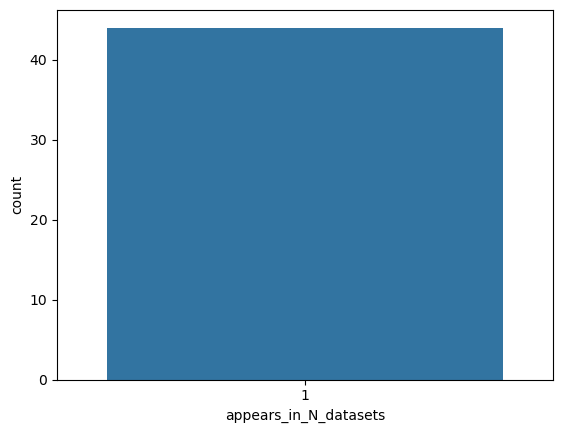

In [17]:
sns.countplot(data=appears, x="appears_in_N_datasets")

In [18]:
combined_literature_chembl_w_counts = combined_literature_chembl.merge(appears, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active,appears_in_N_datasets
0,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,6.480000,0.350523,TELMISARTAN,4,NaN,ChEMBL_curated,True,1
1,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,6.292500,0.473806,FLUNARIZINE,4,NaN,ChEMBL_curated,True,1
2,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ncccn2)CC1,UZEPPAOAIDTLTK-UHFFFAOYSA-N,4.700000,0.000000,NaN,3,NaN,ChEMBL_curated,True,1
3,CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...,GUGOEEXESWIERI-UHFFFAOYSA-N,5.593333,0.448367,TERFENADINE,3,NaN,ChEMBL_curated,True,1
4,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,BYBLEWFAAKGYCD-UHFFFAOYSA-N,6.215000,0.035355,MICONAZOLE,2,NaN,ChEMBL_curated,True,1
5,CCCc1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)...,PBIBEWTURATALQ-UHFFFAOYSA-N,6.600000,0.282843,NaN,2,NaN,ChEMBL_curated,True,1
6,O=C(O)c1ccc(OC2CCN(C(=O)NCc3ccc(Cl)cc3Cl)CC2)cc1,SJFWZPJFJSGSAB-UHFFFAOYSA-N,4.700000,0.000000,NaN,2,NaN,ChEMBL_curated,True,1
7,O=C(NCc1ccccc1OC(F)(F)F)N1CCC(c2ccncc2)C1,QCMYNIHAZUWGBC-UHFFFAOYSA-N,5.000000,NaN,NaN,2,NaN,ChEMBL_curated,True,1
8,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ccccc2)CC1,GNYKLFXXXBPLNY-UHFFFAOYSA-N,5.850000,0.000000,NaN,2,NaN,ChEMBL_curated,True,1
9,CC(C)(C)c1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3cc...,YCADFOXVGUGHRV-UHFFFAOYSA-N,6.160000,NaN,TERFENADONE,1,NaN,ChEMBL_curated,True,1


In [19]:
df_dummies = pd.get_dummies(combined_literature_chembl_w_counts['dataset'], prefix='dataset').join(combined_literature_chembl_w_counts["INCHIKEY"])
df_dummies

,dataset_ChEMBL_curated,INCHIKEY
0,True,RMMXLENWKUUMAY-UHFFFAOYSA-N
1,True,SMANXXCATUTDDT-QPJJXVBHSA-N
2,True,UZEPPAOAIDTLTK-UHFFFAOYSA-N
3,True,GUGOEEXESWIERI-UHFFFAOYSA-N
4,True,BYBLEWFAAKGYCD-UHFFFAOYSA-N
5,True,PBIBEWTURATALQ-UHFFFAOYSA-N
6,True,SJFWZPJFJSGSAB-UHFFFAOYSA-N
7,True,QCMYNIHAZUWGBC-UHFFFAOYSA-N
8,True,GNYKLFXXXBPLNY-UHFFFAOYSA-N
9,True,YCADFOXVGUGHRV-UHFFFAOYSA-N


In [20]:
df_result = df_dummies.groupby('INCHIKEY').max().reset_index()
df_result = df_result.set_index("INCHIKEY")

In [21]:
# cat_dataname = combined_literature_chembl.groupby("INCHIKEY")["dataset"].apply(lambda x: "_+_".join(x)).reset_index(name="dataset_comb").set_index("INCHIKEY")
# cat_dataname

In [22]:
combined_literature_chembl_w_counts = combined_literature_chembl_w_counts.merge(df_result, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active,appears_in_N_datasets,dataset_ChEMBL_curated
0,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,6.480000,0.350523,TELMISARTAN,4,NaN,ChEMBL_curated,True,1,True
1,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,6.292500,0.473806,FLUNARIZINE,4,NaN,ChEMBL_curated,True,1,True
2,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ncccn2)CC1,UZEPPAOAIDTLTK-UHFFFAOYSA-N,4.700000,0.000000,NaN,3,NaN,ChEMBL_curated,True,1,True
3,CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...,GUGOEEXESWIERI-UHFFFAOYSA-N,5.593333,0.448367,TERFENADINE,3,NaN,ChEMBL_curated,True,1,True
4,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,BYBLEWFAAKGYCD-UHFFFAOYSA-N,6.215000,0.035355,MICONAZOLE,2,NaN,ChEMBL_curated,True,1,True
5,CCCc1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)...,PBIBEWTURATALQ-UHFFFAOYSA-N,6.600000,0.282843,NaN,2,NaN,ChEMBL_curated,True,1,True
6,O=C(O)c1ccc(OC2CCN(C(=O)NCc3ccc(Cl)cc3Cl)CC2)cc1,SJFWZPJFJSGSAB-UHFFFAOYSA-N,4.700000,0.000000,NaN,2,NaN,ChEMBL_curated,True,1,True
7,O=C(NCc1ccccc1OC(F)(F)F)N1CCC(c2ccncc2)C1,QCMYNIHAZUWGBC-UHFFFAOYSA-N,5.000000,NaN,NaN,2,NaN,ChEMBL_curated,True,1,True
8,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ccccc2)CC1,GNYKLFXXXBPLNY-UHFFFAOYSA-N,5.850000,0.000000,NaN,2,NaN,ChEMBL_curated,True,1,True
9,CC(C)(C)c1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3cc...,YCADFOXVGUGHRV-UHFFFAOYSA-N,6.160000,NaN,TERFENADONE,1,NaN,ChEMBL_curated,True,1,True


In [23]:
combined_literature_chembl_w_counts.action_type.value_counts()

Series([], Name: count, dtype: int64)

In [24]:
combined_literature_chembl_w_counts.INCHIKEY.nunique()

44

In [25]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

np.int64(21)

In [26]:
# we can just sort by appears_in_N_ChEMBL_assays to get all the chembl data at the top, then uniquify on INCHIKEY

combined_literature_chembl_w_counts.sort_values(["appears_in_N_ChEMBL_assays", "appears_in_N_datasets"], ascending=[False,False],  inplace=True)


In [27]:
# fill common name from gropupby 
combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


/tmp/ipykernel_37779/1877288904.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/tmp/ipykernel_37779/1877288904.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [28]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

np.int64(21)

In [30]:
combined_literature_chembl_w_counts.head()

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active,appears_in_N_datasets,dataset_ChEMBL_curated
0,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,6.480000,0.350523,TELMISARTAN,4,NaN,ChEMBL_curated,True,1,True
1,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,6.292500,0.473806,FLUNARIZINE,4,NaN,ChEMBL_curated,True,1,True
2,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ncccn2)CC1,UZEPPAOAIDTLTK-UHFFFAOYSA-N,4.700000,0.000000,NaN,3,NaN,ChEMBL_curated,True,1,True
3,CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...,GUGOEEXESWIERI-UHFFFAOYSA-N,5.593333,0.448367,TERFENADINE,3,NaN,ChEMBL_curated,True,1,True
4,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,BYBLEWFAAKGYCD-UHFFFAOYSA-N,6.215000,0.035355,MICONAZOLE,2,NaN,ChEMBL_curated,True,1,True


In [31]:
combined_literature_chembl_w_counts.drop_duplicates(subset="INCHIKEY", inplace=True)

In [32]:
combined_literature_chembl_w_counts["action_type"] = combined_literature_chembl_w_counts["action_type"].fillna("inhibitor")

In [33]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["appears_in_N_ChEMBL_assays"].fillna(0) + combined_literature_chembl_w_counts["appears_in_N_datasets"].fillna(0)

In [34]:
combined_literature_chembl_w_counts.sort_values("inclusion_score", ascending=False, inplace=True)

In [40]:
combined_literature_chembl_w_counts.to_csv("final/actives_final.csv", index=False)

In [36]:
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active,appears_in_N_datasets,dataset_ChEMBL_curated,inclusion_score
0,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,6.480000,0.350523,TELMISARTAN,4,inhibitor,ChEMBL_curated,True,1,True,5
1,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,SMANXXCATUTDDT-QPJJXVBHSA-N,6.292500,0.473806,FLUNARIZINE,4,inhibitor,ChEMBL_curated,True,1,True,5
2,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ncccn2)CC1,UZEPPAOAIDTLTK-UHFFFAOYSA-N,4.700000,0.000000,NaN,3,inhibitor,ChEMBL_curated,True,1,True,4
3,CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...,GUGOEEXESWIERI-UHFFFAOYSA-N,5.593333,0.448367,TERFENADINE,3,inhibitor,ChEMBL_curated,True,1,True,4
4,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,BYBLEWFAAKGYCD-UHFFFAOYSA-N,6.215000,0.035355,MICONAZOLE,2,inhibitor,ChEMBL_curated,True,1,True,3
5,CCCc1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)...,PBIBEWTURATALQ-UHFFFAOYSA-N,6.600000,0.282843,NaN,2,inhibitor,ChEMBL_curated,True,1,True,3
6,O=C(O)c1ccc(OC2CCN(C(=O)NCc3ccc(Cl)cc3Cl)CC2)cc1,SJFWZPJFJSGSAB-UHFFFAOYSA-N,4.700000,0.000000,NaN,2,inhibitor,ChEMBL_curated,True,1,True,3
7,O=C(NCc1ccccc1OC(F)(F)F)N1CCC(c2ccncc2)C1,QCMYNIHAZUWGBC-UHFFFAOYSA-N,5.000000,NaN,NaN,2,inhibitor,ChEMBL_curated,True,1,True,3
8,O=C(NCc1ccc(Cl)cc1Cl)N1CCC(Oc2ccccc2)CC1,GNYKLFXXXBPLNY-UHFFFAOYSA-N,5.850000,0.000000,NaN,2,inhibitor,ChEMBL_curated,True,1,True,3
9,CC(C)(C)c1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3cc...,YCADFOXVGUGHRV-UHFFFAOYSA-N,6.160000,NaN,TERFENADONE,1,inhibitor,ChEMBL_curated,True,1,True,2


In [37]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["inclusion_score"].astype(int)

<Axes: xlabel='inclusion_score', ylabel='count'>

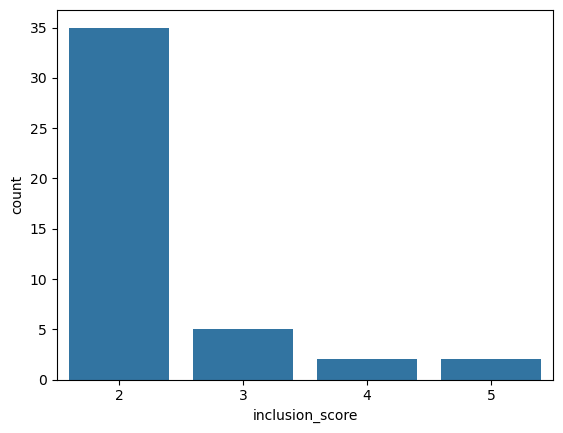

In [38]:
sns.countplot(combined_literature_chembl_w_counts, x="inclusion_score")

<Axes: xlabel='pChEMBL mean', ylabel='Count'>

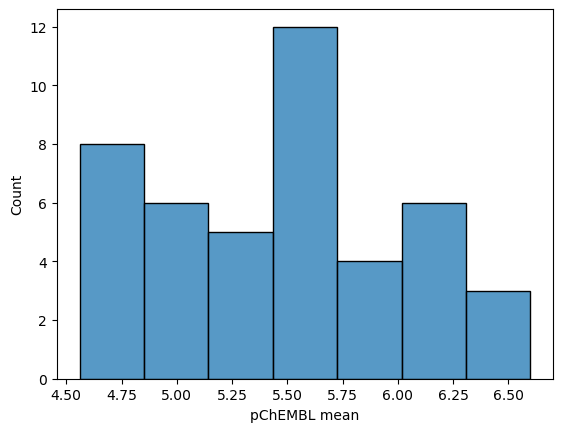

In [39]:
sns.histplot(combined_literature_chembl_w_counts, x="pChEMBL mean")